In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


In [9]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [10]:
df_DA_exploded = df_DA.explode('job_skills')

df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [15]:
df_DA_pivot = df_DA_exploded.pivot_table(columns='job_skills',index='job_posted_month_no',aggfunc='size',fill_value=0)

In [19]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

In [25]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [30]:
df_DA_pivot = df_DA_pivot.drop('Total')

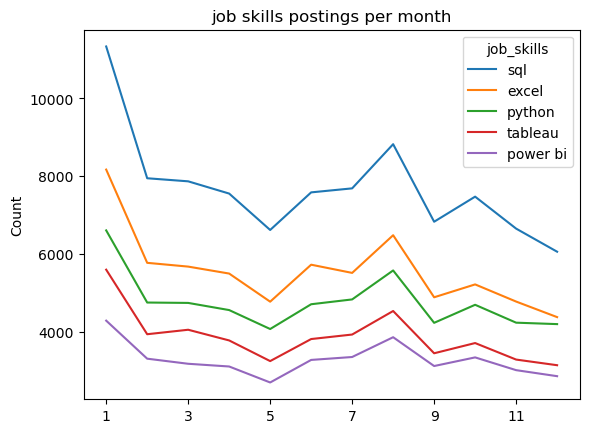

In [32]:
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title('job skills postings per month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [ ]:
df_DA_pivot = df_DA_pivot.reset_index()


In [46]:
df_DA_pivot

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: job_posted_month_no, dtype: object

In [47]:
df_DA_pivot = df_DA_exploded.pivot_table(columns='job_skills',index='job_posted_month_no',aggfunc='size',fill_value=0)

In [48]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot = df_DA_pivot.reset_index()


In [49]:
df_DA_pivot

job_skills,job_posted_month_no,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
0,1,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,0,0,0,0,0,1,1,0,0,0
1,2,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,0
2,3,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,1,0,0,0,0,0,0,0,0,1
3,4,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,0,0,0,0,0,1,0
4,5,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,1,0,0
5,6,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,0
6,7,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,0,1,0,0,0,0,0,0,0
7,8,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,0
8,9,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,1,0,0,0,0,0,0,0,0
9,10,7474,5217,4693,3709,3340,2380,2114,955,990,...,1,0,0,0,0,0,0,0,0,0


In [50]:
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%b'))

In [54]:
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')


KeyError: "None of ['job_posted_month'] are in the columns"

In [56]:
df_DA_pivot = df_DA_pivot.drop(columns=['job_posted_month_no'])

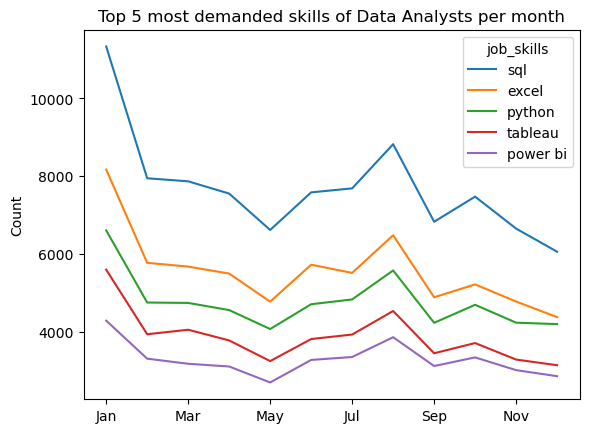

In [59]:
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title('Top 5 most demanded skills of Data Analysts per month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()